<!-- JPN -->
# 次元削減

<!-- ENG -->
# Dimensionality Reduction

<!-- JPN -->
※本演習資料の二次配布・再配布はお断り致します。

<!-- ENG -->
※Distribution or redistribution of these exercise materials without the copyright holder's permission is not permitted.

<!-- JPN -->
　例えば、データが $\boldsymbol{x} = \left[x_1, \dots, x_{10000}\right]$ の10,000次元であるとすると、視覚的に各データがどう散らばっているか、あるいはまとまっているかを確認することは当然困難である。このような高次元のデータを低次元（例えば2次元）でなんとか表現しようとする（正確には「射影する」）ことで、**データの可視化**に役立つのが次元削減である。

<!-- ENG -->
　For example, if the data is $\boldsymbol{x} = \left[x_1, \dots, x_{10000}\right]$, which has 10,000 dimensions, it is naturally difficult to visually check how each data item is scattered or grouped. Dimension reduction is a useful way to **visualize data** by trying to somehow represent (or more accurately, "project") such high-dimensional data in a lower dimension (e.g., two dimensions).

<!-- JPN -->
　この資料では、まず次元削減によるサンプル（データセット）の可視化に取り組む。それぞれの次元削減手法がどのような特徴を持つのか、というところに着目しながら内容を確認してほしい。

　また、次元削減は、教師あり学習における**データノイズの低減**にも使われるので、その利用例にも触れておく。


<!-- ENG -->
　We will use dimensionality reduction methods to visualize the data. I would like you to check the contents of each method, paying attention to the characteristics of each method.

　Dimensionality reduction is also used to **reduce noise in the data** in supervised learning. Examples of its use are also mentioned.

<!-- JPN -->
## 高次元データの目視の難しさ

<!-- ENG -->
## Difficulties in visualizing high-dimensional data

<!-- JPN -->
　手法の説明に入る前に、どのような場合に次元削減が必要になるかを簡単に考えてみよう。ここでは、手書き文字データ（digitsデータ）のうち300件を用いて説明する。


<!-- ENG -->
　Before going into the explanation of the method, let’s briefly consider when dimension reduction is necessary. Here, I will explain the situation by using 300 handwritten character data items (digits data).



In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt

num_data = 300
d = datasets.load_digits()
X = d.data[:num_data]
y = d.target[:num_data]

<!-- JPN -->
　digitsデータは64次元の数値から構成されているが、人間は当然4次元以上のデータの散らばり/まとまり を直感的に理解するのは困難である。そのため、通常は**データを何らかの形で2次元の値に変換して表示したい**と思うわけである。

　例えば以下の場合では、64次元のうち、10次元目と11次元目の2軸を使ってデータの散らばりを見てみる。なお、この10, 11次元目とは、以下の図に示した画素の色を指している。


<!-- ENG -->
　The digits data consists of 64-dimensional numerical values, and it is naturally difficult for humans to intuitively understand the distribution and cohesion of data with more than 4 dimensions. Therefore, we usually want to **convert the data into two-dimensional values in some way and display them**.



　For example, in the following case, let's look at the data distribution using the two axes of the 10th and 11th dimensions of the 64 dimensions. Note that the 10th and 11th dimensions refer to the colors of the pixels shown in the following figure.



<img src="https://i.imgur.com/DNoTMPI.png" alt="Figure x" width="50%">

In [2]:
## Function for 2D visualization of handwritten character data
def plot_digits(X, y, n_labels=10, title=None):
  # plot X/y in 2-dimensions
  plt.figure(figsize=(5,5))

  # set color palette for plot
  color = [plt.cm.nipy_spectral(i/n_labels, 1) for i in range(n_labels)]

  # plot by each label
  for i in range(n_labels):
    plt.scatter(X[y==i, 0], X[y==i, 1],
                color=color[i], marker=f"${i}$")
  plt.xlabel("1st axis")
  plt.ylabel("2nd axis")
  plt.title(title)
  plt.show()

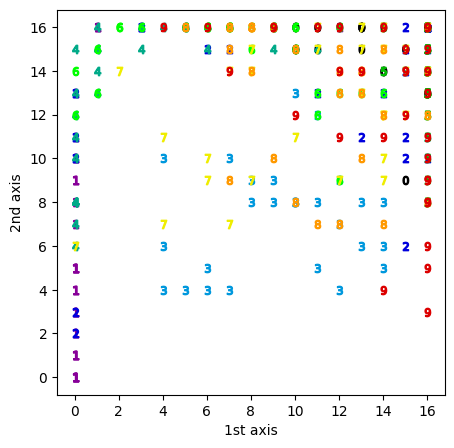

In [3]:
# Draw using the 10th and 11th dimensions of all data (300 items)
plot_digits(X[:, [10,11]], y, n_labels=10)

<!-- JPN -->
　値が整数値しかとらないこともあり碁盤の目のように整列しているのは良いが、残念ながら各文字がキレイに分離されているとは言い難い状態であることがわかる。


<!-- ENG -->
　It is a good thing that the values are aligned like a grid because they only take integer values. However, unfortunately, you can see it is difficult to say that each character is neatly separated.



<!-- JPN -->
## 主成分分析 (principal component analysis; PCA)

<!-- ENG -->
## Principal component analysis (PCA)

<!-- JPN -->
　まず、次元削減方法の1つとして、主成分分析 (PCA) に触れる。長さ $K$ のベクトルであるようなデータ $\boldsymbol{x}_n$ を、より低次元である $r$ 次元のベクトルに線形変換するものである。

　では、実際にPCAを行い、結果を可視化してみよう。 今回は2次元に可視化するため、`n_components=2`を指定する。


<!-- ENG -->
Principal component analysis (PCA) is one of dimensionality reduction methods, and is a linear transformation of data $\boldsymbol{x}_n$, such as a vector of length $K$, into a lower dimensional vector of dimension $r$.

Now, let's actually do PCA and visualize the results. This time, we will specify `n_components=2` to visualize it in two dimensions.


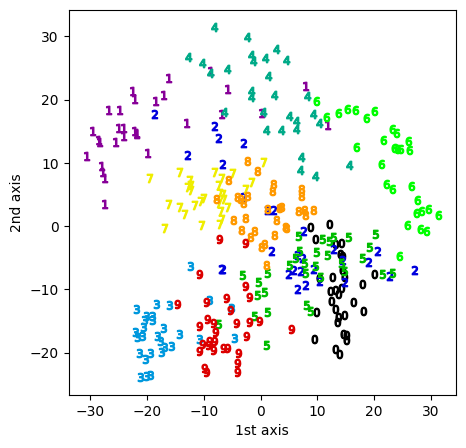

In [4]:
# prepare PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # 2 components will be used
pca.fit(X) # obtain principal component
images_map = pca.transform(X) # transform input data using PCA

plot_digits(images_map, y, n_labels=10)

<!-- JPN -->
　1 で試した結果に比べて、数字ごとの塊が構成できていることがわかる。

<!-- ENG -->
　Compared to the results we tried in 1, we can see that we are able to compose chunks of each number.

<!-- JPN -->
　PCAでは、各主成分（固有ベクトル）の値を見ることで、どの説明変数が主要な寄与をしているか、また各主成分の固有値がデータの分散のどれだけの割合を表しているか確認することができる。実際に各成分の寄与を見てみよう。

<!-- ENG -->
　With PCA, by looking at the value of each principal component (eigenvector), we can check which explanatory variables are the main contributors and how much of the variance in the data is represented by the eigenvalues of each principal component. Let's take a look at the actual contribution of each component.

In [5]:
import pandas as pd
pca = PCA(n_components=3).fit(X) # PCA, use 3 components

columns = range(64)
indexes = ["PC1", "PC2", "PC3"]
components = pca.components_ # get components from PCA result

print(pd.DataFrame(components, index=indexes, columns=columns))

               0         1         2         3         4         5         6   \
PC1  2.913330e-18  0.000984  0.008866  0.118866 -0.056783 -0.171844 -0.044215   
PC2 -6.354556e-18 -0.023672 -0.255373 -0.246952  0.055550  0.019737  0.002306   
PC3 -4.294286e-18  0.038710  0.215437  0.123799  0.091058  0.153439  0.056270   

           7             8         9   ...        54        55   56        57  \
PC1 -0.004093  0.000000e+00  0.035431  ...  0.114250  0.002496  0.0  0.001445   
PC2  0.000985 -8.326673e-17 -0.077375  ... -0.060070  0.000430  0.0 -0.021826   
PC3  0.007944 -1.110223e-16  0.079130  ... -0.161661 -0.003160 -0.0  0.040464   

           58        59        60        61        62        63  
PC1  0.001661  0.113164  0.074104  0.013298  0.049194  0.000278  
PC2 -0.264832 -0.259050  0.005141  0.026306  0.006144 -0.001254  
PC3  0.235633  0.122043 -0.240898 -0.234537 -0.034888 -0.000164  

[3 rows x 64 columns]


<!-- BOTH -->
----

<!-- JPN -->
##### 課題 1

　以下に swiss-roll データセットを生成し、3次元空間に描画するコードを示す。swiss-roll データセットでは、データがうずまき状に並んでいる。

　主成分分析 PCA を swiss-roll データセットに適用し、うずまきを展開するようには **機能しない** ことを確認せよ。また、なぜそのようになるかを考察せよ。

<!-- ENG -->
##### Exercise 1

　The following code generates a swiss-role dataset and draws it in 3D space.

　Apply the principal component analysis (PCA) to the swiss-roll dataset and confirm that it **does not work** to unroll the swirl. Also, discuss why this is the case.

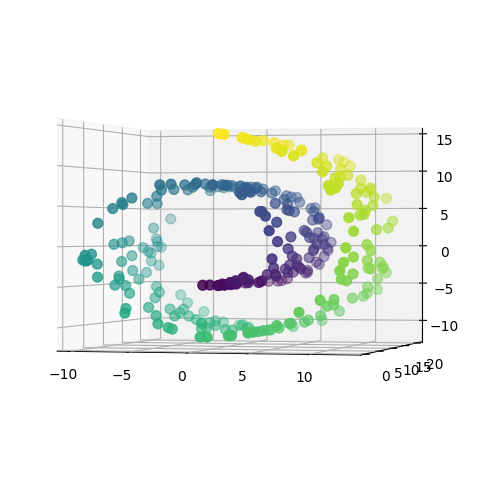

In [6]:
# X_sr: 300 data of 3D coordinate
# t_sr: 300 data of coloring value
X_sr, t_sr = datasets.make_swiss_roll(n_samples=300, random_state=42)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.view_init(0, -75)
ax.scatter(X_sr.T[0], X_sr.T[1], X_sr.T[2], c=t_sr, s=50)
plt.show()

<!-- JPN -->
なお、これらは digits データではないため `plot_digits()` 関数を用いることは出来ない。代わりに以下のコードを利用せよ。

<!-- ENG -->
Note that the `plot_digits()` function cannot be used since these are not digits data. Use the following code instead.

Text(0, 0.5, '2nd axis')

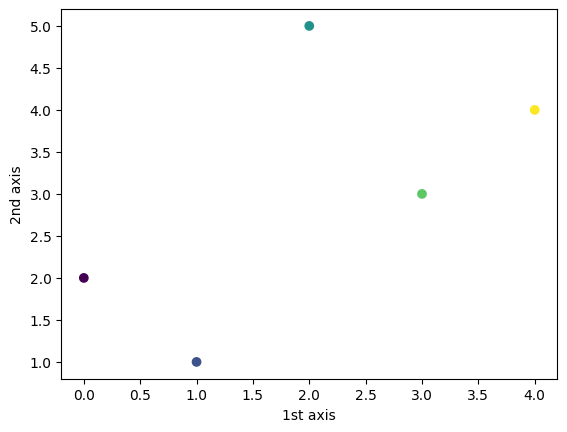

In [8]:
# example data
example_first  = [0,  1,  2,  3,  4]
example_second = [2,  1,  5,  3,  4]
example_color  = [0,0.1,0.2,0.3,0.4]

# draw 2D scatter plot
plt.scatter(example_first, example_second, c=example_color)
plt.xlabel("1st axis")
plt.ylabel("2nd axis")

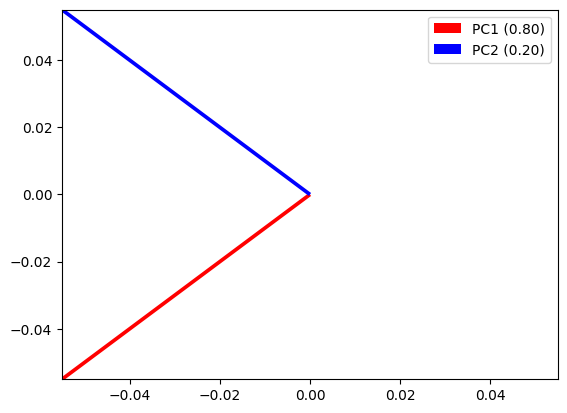

In [9]:
# CODE CELL FOR CONFIRMATION
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = list(zip(example_first, example_second))
pca.fit(X)
components = pca.components_
explained_variance = pca.explained_variance_ratio_

origin = [0, 0]
plt.quiver(*origin, *components.T[0], angles='xy', scale_units='xy', scale=1, color='r', label=f'PC1 ({explained_variance[0]:.2f})')
plt.quiver(*origin, *components.T[1], angles='xy', scale_units='xy', scale=1, color='b', label=f'PC2 ({explained_variance[1]:.2f})')

plt.legend()
plt.show()

<!-- JPN -->
<font color=orange> **このテキストセルに答案を記述せよ。** </font>

<!-- ENG -->
<font color=orange> **Write your answer in this text cell.** </font>

 PCA is not suitable for unrolling the Swiss-roll because it's a linear dimensionality reduction technique, and the Swiss-roll is a non-linear dataset with a spiral structure. Non-linear dimensionality reduction techniques are more appropriate for capturing and visualizing the intrinsic structure of such datasets.


<!-- BOTH -->
----

<!-- JPN -->
##### 課題 2
　課題 1で示したような swiss-roll データセットについて、うずまきの内側とうずまきの外側を分離することのできる次元削減手法を **後述するグラフ埋め込み以外で** 調べ答えよ。



<!-- ENG -->
##### Exercise 2
　For the swiss-roll data set such as the one shown in Exercise 1, search and answer the dimensionality reduction methods, **excluding graph embedding**, that can separate the inside of the spiral from the outside of the spiral.


<!-- JPN -->
<font color=orange> **このテキストセルに答案を記述せよ。** </font>

<!-- ENG -->
<font color=orange> **Write your answer in this text cell.** </font>

t-SNE is a non-linear dimensionality reduction technique that is particularly good at preserving local structures in the data. It can reveal the intrinsic structure of the Swiss-roll and separate points in the inner coil from those on the outer layers.

Deep learning autoencoders can be also used for non-linear dimensionality reduction. They have the capacity to learn complex mappings that may help separate the inside and outside of the spiral.

<!-- BOTH -->
-----

<!-- JPN -->
## 正準相関分析 (Canonical Correlation Analysis; CCA)

<!-- ENG -->
## Canonical correlation analysis (CCA)

<!-- JPN -->
　主成分分析 (PCA) は**1種類のデータが多数存在**する場合に、データを表すベクトルや、データ間の非類似度を元に低次元空間で表現しようとするものであった。

　正準相関分析 (CCA) は**組になっている**2種類のデータが多数存在する場合に、それらのデータを**同じ低次元空間で表現**しようとするものである。

　2種類のデータの列 $(\boldsymbol{x}_1, \boldsymbol{z}_1), \ldots, (\boldsymbol{x}_n, \boldsymbol{z}_n)$ に対して、**$\boldsymbol{x}$ と $\boldsymbol{z}$ に共通した**低次元表現を求めるために、CCAでは以下の最適化問題を解いて行列 $A$, $B$ を求める。（なお、後述の例で取り扱うように、CCAでは2種類のデータ $\boldsymbol{x}$ と $\boldsymbol{z}$ の次元数は等しくなくてもよい。）

<!-- ENG -->
　PCA is intended to represent **a large number of data of one type** in a low-dimensional space based on vectors representing the data and dissimilarities between the data.

　Canonical correlation analysis (CCA) is intended to represent a large number of **paired** data **in the same low-dimensional space**.

　In order to find a low-dimensional representation **common to $\boldsymbol{x}$ and $\boldsymbol{z}$** for two columns of data $(\boldsymbol{x}_1, \boldsymbol{z}_1), \ldots, (\boldsymbol{x}_n, \boldsymbol{z}_n)$, CCA solves the following optimization problem to obtain matrices $A$, $B$. (As handled in the following example, with CCA, the number of dimensions of the two types of data $\boldsymbol{x}$ and $\boldsymbol{z}$ do not have to be equal.)

<!-- BOTH -->
$$
\min_{A,B}\frac{1}{n} \sum_{i=1}^{n}\|A^T x_i - B^T z_i \|^2 \ \ \ \
{\rm s.t. }\ \
\mathbb{V}[A^T x_i]=\mathbb{V}[B^T z_i] = I_r
$$

<!-- JPN -->
　例えば、$x$, $z$がそれぞれ1次元のデータで、$x$ と $z$ に共通するシグナル $c_i$ と、$x$ と $z$ で相互の関係が無く発生するノイズ $n_i, n'_i$ から構成されるとしよう。ただし、ノイズはシグナルに比べると幾分強く、簡単にはシグナルを発見できない状態を考える。


<!-- ENG -->
　For example, suppose that $x$ and $z$ are one-dimensional data, each consisting of a signal $c_i$ common to $x$ and $z$ and noise $n_i, n'_i$ occurring in $x$ and $z$ with no mutual relationship. However, consider a situation where the noise is somewhat stronger than the signal and the signal cannot be easily detected.



<!-- BOTH -->
$$
\left\{
\begin{array}{l}
  x_i= \varepsilon c_i+n_i \\
  z_i= \varepsilon c_i+n'_i \\
\end{array}
\right.
$$

<!-- JPN -->
$\varepsilon$ は小さい定数であり、シグナルに比べてノイズが強いことを意味している。

　このようなとき、**PCAではノイズ $n_i, n_i'$ を強く検出してしまうが、CCAは $c_i$ を検出することが可能である**（実際に疑似データを使って実験してみると良い）。



<!-- ENG -->
$\varepsilon$ is a small constant, meaning that the noise is strong compared to the signal.



　In such cases, **PCA strongly detects the noise $n_i, n_i'$, while CCA can detect $c_i$** (you can actually experiment with pseudo data).


<!-- JPN -->
### CCAの実行

　今回は、講義で行ったものと同様に、手書き文字画像を上下に分割し、この分割されたデータ対に対してCCAを適用、それらが関連付けられるかどうかを確認する。ここでは画像の上部48次元を $\boldsymbol{x}$、下部16次元を $\boldsymbol{z}$ とする。

<!-- ENG -->
### Executing CCA

　This time, we will split the handwritten text image into upper and lower parts, as we did in the lecture, and apply CCA to the split data pairs to see if they can be associated. Here, the upper 48 dimensions of the image are $\boldsymbol{x}$ and the lower 16 dimensions are $\boldsymbol{z}$.

<img src="https://i.imgur.com/xP3OAuI.png" alt="digits split" width="70%"></img>

<!-- JPN -->
**digitsデータの分割** 前述したように、CCAでは $\boldsymbol{x}$ と $\boldsymbol{z}$ の次元数は等しくなくてもよい。


<!-- ENG -->
**Splitting the digits data** As mentioned above, the number of dimensions of $\boldsymbol{x}$ and $\boldsymbol{z}$ do not have to be equal in CCA.



In [10]:
num_data = 300
d = datasets.load_digits()
D = d.data[:num_data]
y = d.target[:num_data]

X = D[:, :48] # 0...47
Z = D[:, 48:] # 48...63

<!-- JPN -->
続いて、`X`, `Z` を画像ではなく「数値の羅列」として考えて正準相関分析を実行する。

<!-- ENG -->
Next, CCA is performed by considering `X` and `Z` as a "sequence of numbers" rather than images.

In [11]:
# Think of it as a series of numbers, not images.
print("X[0] =", X[0])
print("Z[0] =", Z[0])

X[0] = [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.]
Z[0] = [ 0.  2. 14.  5. 10. 12.  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [12]:
# Perform CCA based on X and Z, and optimize matrices A and B
from sklearn.cross_decomposition import CCA
cca = CCA(n_components=2, scale=True)
cca.fit(X, Z)

CCA()

<!-- JPN -->
これで、CCAの行列 $A$, $B$ の最適化が行われた。教師なし学習を行った際のデータを入力してみよう。



<!-- ENG -->
Now the matrices $A$ and $B$ of the CCA have been optimized. Let's input the data from the unsupervised learning.


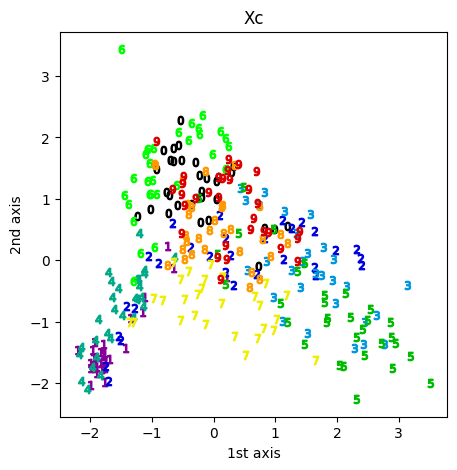

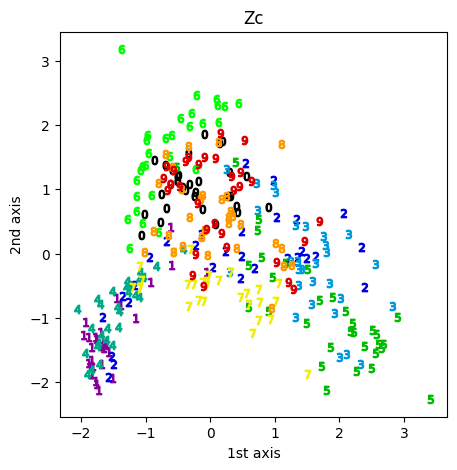

In [13]:
Xc, Zc = cca.transform(X, Z)
plot_digits(Xc, y, title="Xc")
plot_digits(Zc, y, title="Zc")

<!-- JPN -->
　実行結果から、$X$と$Z$が同一の特徴空間に射影されており、対応関係にある $\boldsymbol{x}_i$ と $\boldsymbol{z}_i$ が特徴空間内で近接し、また同じ数字は同じような位置に射影されている。この結果から、CCAによって画像の上部分と下部分が関連付けられた低次元表現が得られたことがわかる。

<!-- ENG -->
　From the execution results, we can see that $X$ and $Z$ are projected into the same feature space, the corresponding $\boldsymbol{x}_i$ and $\boldsymbol{z}_i$ are close to each other</font>, and the same numbers are projected into similar locations. This result shows that CCA has produced a low-dimensional representation of the image with the upper and lower parts associated with it.

<!-- JPN -->
　なお、発展的な例として、 [正準相関分析を用いた図書推薦](https://qiita.com/yanagi3150/items/7c84f7d9200e57436879) の記事を作成しているので、さらにCCAの理解を深めたい場合にはこちらも参照してほしい。

<!-- ENG -->
　Additionally, we created a post in Qiita (in Japanese), titled ["Book Recommendations on CCA"](https://qiita.com/yanagi3150/items/7c84f7d9200e57436879) . So refer to this post if you want to deepen your understanding of CCA.

---

<!-- JPN -->
##### 課題 3
以下のデータに対して第1主成分のみを取得するCCAを実施し、$X$ と $Z$ に共通する関数 $\boldsymbol{c} = \sin(\boldsymbol{t})$ と、$X$ をCCAによって変換した $\hat{\boldsymbol{c}}_X$ の比較を行う。$\boldsymbol{c}$ と $\hat{\boldsymbol{c}}_X$ の 相関係数 `c_hat_corrcoef` を算出することで、それらがどの程度類似しているか確認せよ。

<!-- ENG -->
##### Exercise 3
Perform CCA and obtain only the first principal components for the following data and then calculate the correlation coefficient `c_hat_corrcoef` of projected $X$ ($\hat{\boldsymbol{c}}_X$) and the function $\boldsymbol{c} = \sin(\boldsymbol{t})$ which is common to $X$ and $Z$.

<!-- BOTH -->
$$ \begin{aligned}
\boldsymbol{t} & = [0,0.01, ... 9.99]   \\
\boldsymbol{c} & = \sin(\boldsymbol{t}) \\
\\
X & =
\left[
\begin{array}{l}
  \boldsymbol{c} + \frac{\boldsymbol{t}}{5}      + \delta \\
  \exp(\boldsymbol{t}/10) + \delta \\
\end{array}
\right] \\
Z & =
\left[
\begin{array}{l}
  \delta \\
  \boldsymbol{c} + \cos(4\boldsymbol{t}) + \delta \\
\end{array}
\right]
\end{aligned}$$


<!-- JPN -->
ただし、 $\delta$ は平均0、分散1のガウス雑音 (Gaussian noise) である。

<!-- ENG -->
where $\delta$ is Gaussian noise with mean of 0 and variance of 1.

In [14]:
import numpy as np

def gen_data():
  np.random.seed(42)
  length = 10
  delta = 0.01

  t = np.arange(0, length, delta)
  c = np.sin(t)

  X = np.vstack([
    c + t/5      + np.random.normal(size=len(t)),
    np.exp(t/10) + np.random.normal(size=len(t))
  ]).T

  Z = np.vstack([
    np.random.normal(size=len(t)),
    c + np.cos(t*4) + np.random.normal(size=len(t))
  ]).T


  return c, X, Z

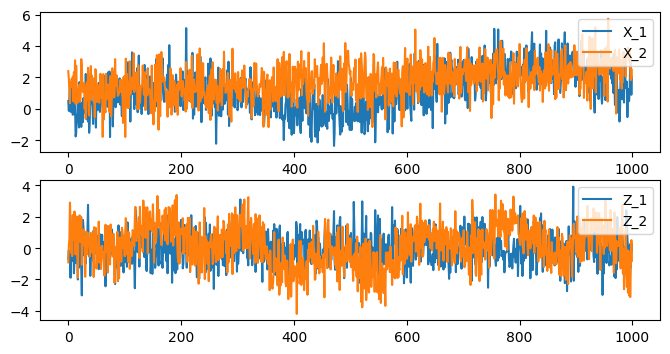

In [15]:
sine_wave, X, Z = gen_data()

fig = plt.figure(figsize=(8,4))
ax_x = fig.add_subplot(211)
ax_z = fig.add_subplot(212)

for i in range(X.shape[1]):
  ax_x.plot(X[:,i], label=f'X_{i+1}')
ax_x.legend(loc='upper right')

for i in range(Z.shape[1]):
  ax_z.plot(Z[:,i], label=f'Z_{i+1}')
ax_z.legend(loc='upper right')

plt.show()

In [23]:
# CODE CELL FOR YOUR ANSWER

import numpy as np
from sklearn.cross_decomposition import CCA
from scipy.stats import pearsonr

cca = CCA(n_components=1)
cca.fit(X, Z)
c_hat, _ = cca.transform(X, Z)
c_hat_corrcoef, _ = pearsonr(c_hat.ravel(), sine_wave)
print(f"Correlation Coefficient between c_hat and sine_wave: {c_hat_corrcoef:.4f}")

Correlation Coefficient between c_hat and sine_wave: 0.5111


---

<!-- JPN -->
### CCAによる画像の復元（発展）

  主成分分析 (PCA) および正準相関分析 (CCA) はいずれも線形変換を行うものであるため、線形変換を表す行列の逆行列との行列積をとることで、画像を復元することが可能である。
  ここでは、CCAを用いて低次元化した画像を復元してみよう。


<!-- ENG -->
### Image recovery using CCA (Advanced)

Both of principal component analysis (PCA) and canonical correlation analysis (CCA) reduce dimensions with linear transformation. Thus, we can reconstruct an image by multiplying inverse matrix. Let’s try to recover an image that has been reduced the dimensionality by using CCA.


In [24]:
# prepare dataset
num_data = 300
d = datasets.load_digits()
D = d.data[:num_data]
y = d.target[:num_data]

X = D[:, :48] # 0...47  feature
Z = D[:, 48:] # 48...63 feature

# prepare one test image
image_index = 0
X_test = D[image_index, :48].reshape(1, -1)
Z_test = D[image_index, 48:].reshape(1, -1)


In [25]:
# projection and inverse-projection by CCA
from sklearn.cross_decomposition import CCA
cca = CCA(n_components=16, scale=True)
cca.fit(X, Z)
Xc, Zc = cca.transform(X, Z)

X_test_map, Z_test_map = cca.transform(X_test, Z_test)
X_recovered_from_X = cca.inverse_transform(X_test_map)
X_recovered_from_Z = cca.inverse_transform(Z_test_map)

/usr/local/lib/python3.10/dist-packages/sklearn/cross_decomposition/_pls.py:300: UserWarning: Y residual is constant at iteration 14
  warnings.warn(f"Y residual is constant at iteration {k}")


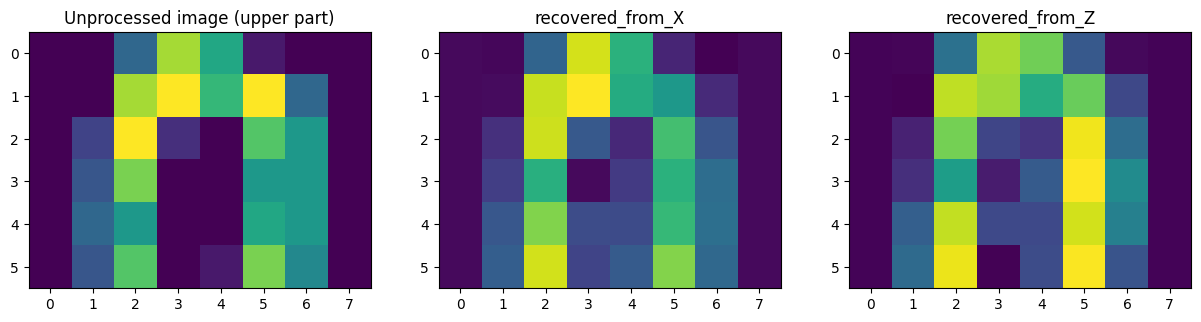

In [26]:
# plot 3 images
X_test_image = X_test.reshape(6, 8)
X_recovered_from_X_image = X_recovered_from_X.reshape(6, 8)
X_recovered_from_Z_image = X_recovered_from_Z.reshape(6, 8)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(X_test_image)
plt.title("Unprocessed image (upper part)")

plt.subplot(1, 3, 2)
plt.imshow(X_recovered_from_X_image)
plt.title("recovered_from_X")

plt.subplot(1, 3, 3)
plt.imshow(X_recovered_from_Z_image)
plt.title("recovered_from_Z")

plt.show()

<!-- JPN -->
上の3セルを実行すると三つの画像が出てくる。

左から、それぞれ元の画像の上側、上側を変換・逆変換して上側を復元したもの、下側を変換・逆変換して上側を復元したものである。

`image_index`や`n_components`を変更していくつかの例を試してみよう。
CCAによって画像の上側と下側を関連付けることにより、画像の下側から上側をある程度の精度で復元することが可能になった。


<!-- ENG -->
If you run the three cells above, you will get three images.

From left to right, the upper side of the original image, the upper side which is recovered by transforming and inverse transforming the upper side, and the upper side which is recovered by transforming and inverse transforming the lower side, respectively.

Let's try a few examples by changing `image_index` and `n_components`.
By associating the upper and lower sides of the image using CCA, it is now possible to recover the upper side from the lower side of the image with some accuracy.


<!-- BOTH -->
<img src=https://i.imgur.com/a2mY8UK.png width=500px>

----

<!-- JPN -->
## グラフ埋め込み (Graph Embedding)

<!-- ENG -->
## Graph Embedding

<!-- JPN -->
　もう1つの次元削減手法として、グラフ埋め込み (Graph Embedding) について試してみよう。この手法は、データ間の関係をノード（頂点、node）とエッジ（枝、辺、edge）で表現し、 **「エッジが張られている2つのノード $i, j$ は一定の類似関係がある」** ということに基づいて低次元空間に射影する。
この手法は **非線形な次元削減を実現** できており、たとえば主成分分析 PCA や正準相関分析 CCA よりも複雑な次元削減を行うことができる。


<!-- ENG -->
　Let's try another dimensionality reduction method, Graph Embedding (GE). This method projects data into a low-dimensional space based on data relationship graph, which nodes represent data points and **edges represent similarity relationship between nodes (datapoints) $i, j$**.This method is capable of **non-linear dimensionality reduction** and can perform more complex dimensionality reduction than, for example, PCA or CCA.

<!-- JPN -->
　グラフ埋め込みは、「エッジが張られている2つのノード $i,j$ が、低次元空間でも近くに存在してほしい」ので、以下の最適化問題を解くことで達成される。

<!-- ENG -->
　Since "two nodes $i,j$ that are edged should be close together, even in low-dimensional space," it is accomplished by solving the following optimization problem.

<!-- BOTH -->
$$
\min_{z_1, \dots, z_n} \sum_{i,j}w_{ij}\|z_i - z_j \|^2 \ \ \ \
{\rm s.t. }\ \
Z^TDZ=I
$$

<!-- JPN -->
　ただし、$W=(w_{ij})$ はグラフのエッジを隣接行列で表したものであり、$D=(d_{ij})$ は対角成分 $d_{ii} = \sum_jw_{ij}$ からなる対角行列である。

<!-- ENG -->
　where $W=(w_{ij})$ is the adjacency matrix of the graph and $D=(d_{ij})$ is the diagonal matrix with diagonal components $d_{ii} = \sum_jw_{ij}$.

<!-- JPN -->
　それでは、先述した swiss-roll dataset を使って、グラフ埋め込みがどのように機能するのか、見てみよう。ここでは、グラフの隣接行列 $W$ の各成分 $w_{ij}$ について、**ノード $i$ について、ユークリッド距離が最も近い5つのノード $j_1, ..., j_5$ に対してエッジを張る（$w_{ij}=1$ にする）** ことにしよう。

<!-- ENG -->
　Now let's see how the graph embedding works with the swiss-roll dataset described above. Here, we assume that **each node $i$ has edges to five nearest nodes $j_1, ..., j_5$ ($w_{ij_k}=1$) in terms of euclidean distance**.  

<!-- JPN -->
　まず、500個の点からなるswiss-rollデータを作成する。

<!-- ENG -->
　First, swiss-roll data consisting of 500 points is created.

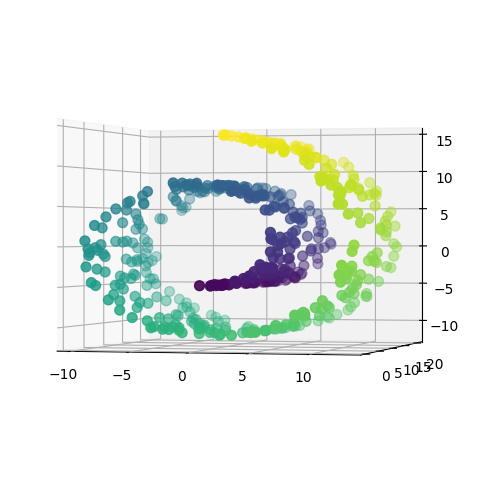

In [27]:
# X_sr: 500 data of 3D coordinate
# t_sr: 500 data of coloring value
X_sr, t_sr = datasets.make_swiss_roll(n_samples=500, random_state=42)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.view_init(0, -75)
ax.scatter(X_sr.T[0], X_sr.T[1], X_sr.T[2], c=t_sr, s=50)
plt.show()

<!-- JPN -->
　次に、500個の点について、最も近い5つの点を求めて、隣接行列 $W$ を作成する。

<!-- ENG -->
　Next, the adjacency matrix $W$ is created by finding the five nearest points for each of the 500 points.

In [28]:
from scipy.spatial.distance import pdist, squareform

# Calculate the distances between all pairs of node
distance_matrix = squareform(pdist(X_sr))

# Find the 5 nearest node
# omit the nearest node since it is itself
NUM_NEAREST = 5
nearest_indices = np.argsort(distance_matrix, axis=1)[:, 1:1+NUM_NEAREST]

# Create adjacency matrix
adjacency_matrix = np.zeros(distance_matrix.shape)
for i, nearest_nodes in enumerate(nearest_indices):
  for node in nearest_nodes:
    adjacency_matrix[i, node] = 1
    adjacency_matrix[node, i] = 1 # symmetric matrix

<!-- JPN -->
　このコードによって、隣接行列 $W$ を作成することができたので、グラフ埋め込み `SpectralEmbedding()` を実際に利用してみる。

<!-- ENG -->
　We have created the adjacency matrix $W$ above, and we can use the graph embedding `SpectralEmbedding()`.

In [29]:
from sklearn.manifold import SpectralEmbedding

se = SpectralEmbedding(n_components=2, affinity="precomputed", random_state=42)
X_sr_transformed = se.fit_transform(adjacency_matrix)


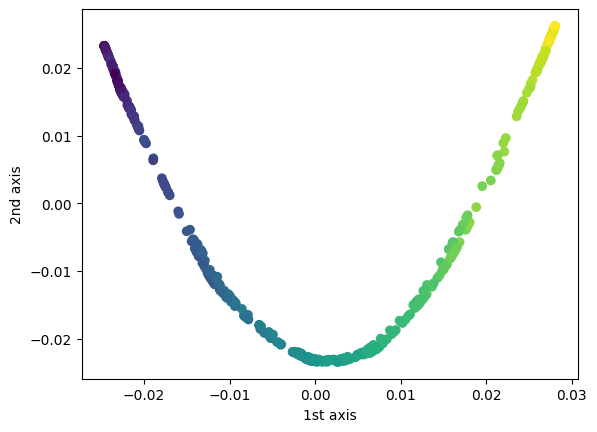

In [30]:
plt.scatter(X_sr_transformed[:,0], X_sr_transformed[:,1], c=t_sr)
plt.xlabel("1st axis")
plt.ylabel("2nd axis")
plt.show()


<!-- JPN -->
　これを見ると、しっかりと swiss-roll が展開され、グラデーションが1方向に揃っていることが分かる。

<!-- ENG -->
　This figure shows that the swiss-roll is well unrolled and the color gradient is in one direction.

<!-- JPN -->
　なお、実は、ここまでの処理は手作業で行う必要はない。単に以下のようなコードを記述するだけで、簡単に実行することができる。

<!-- ENG -->
　Note that the process so far does not have to be done manually. It can be easily performed with the following code.

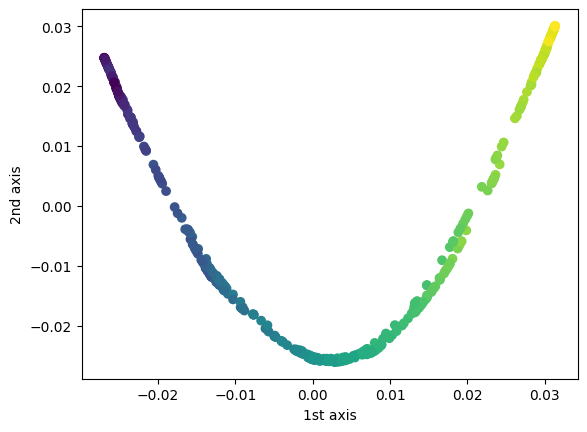

In [31]:
NUM_NEAREST = 5

# affinity: the criteria to create edges
# n_neighbors counts oneselves, and should be incremented by 1
se = SpectralEmbedding(n_components=2, affinity="nearest_neighbors", n_neighbors=NUM_NEAREST+1, random_state=42)
X_sr_transformed = se.fit_transform(X_sr)
plt.scatter(X_sr_transformed[:,0], X_sr_transformed[:,1], c=t_sr)
plt.xlabel("1st axis")
plt.ylabel("2nd axis")
plt.show()


---

<!-- JPN -->
##### 課題 4（発展）
　上記の課題は、 `NUM_NEAREST = 5` で行ったが、これを `NUM_NEAREST = 2` にすると結果が変化する。グラフ埋め込みの結果や、swiss-roll データセットそのものを目視し、なぜこのような結果になったのか考察せよ。

<!-- ENG -->
##### Exercise 4
The above was performed with `NUM_NEAREST = 5`, but when this is changed to `NUM_NEAREST = 2`, the results change. Examine the results of the graph embedding and visually inspect the swiss-roll dataset itself to discuss why this change in results occurred.


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


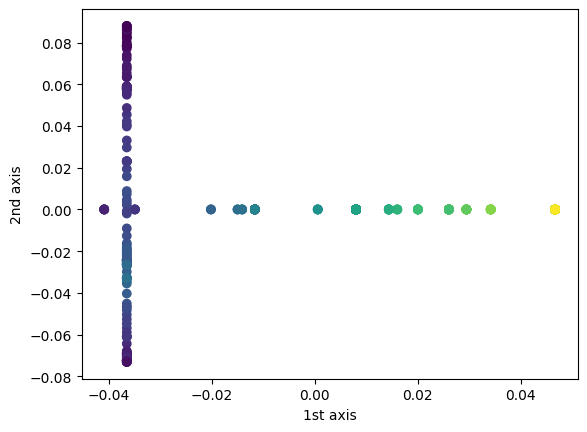

In [32]:
# CODE CELL TO EXAMINE NUM_NEAREST = 2
NUM_NEAREST = 2
se = SpectralEmbedding(n_components=2, affinity="nearest_neighbors", n_neighbors=NUM_NEAREST+1, random_state=42)
X_sr_transformed = se.fit_transform(X_sr)

plt.scatter(X_sr_transformed[:,0], X_sr_transformed[:,1], c=t_sr)
plt.xlabel("1st axis")
plt.ylabel("2nd axis")
plt.show()


<!-- JPN -->
<font color=orange> **このテキストセルに答案を記述せよ。** </font>

<!-- ENG -->
<font color=orange> **Write your answer in this text cell.** </font>

NUM_NEAREST = 5 is a larger number of nearest neighbors for each data point. This means that the adjacency matrix W takes into account more local information, and the resulting graph captures more local relationships between data points. A larger NUM_NEAREST lead to smoother, more stable embeddings.

On the other hand, with NUM_NEAREST = 2, a smaller subset of nearest neighbors. This results in a graph with sparser connections, and it captures less local information but focuses more on global relationships. A smaller NUM_NEAREST provide more detailed and complex representations.

---

<!-- JPN -->
##### 課題 5（実践、提出不要）

<!-- ENG -->
##### Exercise 5 (Practical, not required to submit)

<!-- JPN -->
　より実践的なデータを用いてグラフ埋め込みを用いた可視化とデータの解釈を行う。

<!-- ENG -->
　Let's visualize and interpret data using graph embedding with more practical data.

<!-- JPN -->
　今回用いるデータ `latlng_data.csv` は日本の47都道府県庁所在地の緯度経度のデータである。このデータを用いて都道府県間の近接関係を可視化することを目標とした解析を行う。

<!-- ENG -->
　The data for this exercise `latlng_data.csv` is the latitude and longitude data of the 47 prefectural capitals of Japan. The goal of this analysis is to visualize the neighborhood relationship between prefectures using this data.

In [34]:
import pandas as pd
df_pref = pd.read_csv("latlng_data.csv")

In [35]:
df_pref.head()

,prefecture,city,latitude,longitude
0,Hokkaido,Sapporo,43.064310,141.346879
1,Aomori,Aomori,40.824589,140.740548
2,Iwate,Morioka,39.703526,141.152696
3,Miyagi,Sendai,38.268579,140.872072
4,Akita,Akita,39.718626,140.102381


<!-- JPN -->
`prefecture`が都道府県名、`city`が都道府県庁所在地、`latitude` が緯度、`longitude`が経度を表している。

　日本の都道府県ではそのまま緯度経度を用いても問題ないが、全地球上の都市を扱うことを想定し、緯度経度の情報をxyz座標に変換する。

<!-- ENG -->
　There are four columns: the names of prefectures `prefecture`, the names of prefectural capitals `city`, the latitude `latitude`, and the longitude `longitude`.

　For Japanese prefectures, there is no problem using latitude and longitude as they are, but assuming that we are dealing with cities on the entire globe, the latitude and longitude information is converted to 3D coordinates `x`, `y`, and `z` by below code.

In [36]:
import numpy as np

def latlng2xyz(lat, lon):
    # Convert latitude and longitude information to x, y, z coordinates
    phi = lat * (np.pi/180)
    theta = lon * (np.pi/180)
    x = np.cos(phi) * np.cos(theta)
    y = np.cos(phi) * np.sin(theta)
    z = np.sin(phi)

    return x, y, z

# Add x, y, z coordinates to the dataframe df_pref
df_pref["x"], df_pref["y"], df_pref["z"] = latlng2xyz(
    df_pref["latitude"].values,
    df_pref["longitude"].values)

print(df_pref.head())

  prefecture     city   latitude   longitude         x         y         z
0   Hokkaido  Sapporo  43.064310  141.346879 -0.570546  0.456328  0.682819
1     Aomori   Aomori  40.824589  140.740548 -0.585915  0.478874  0.653745
2      Iwate  Morioka  39.703526  141.152696 -0.599193  0.482579  0.638815
3     Miyagi   Sendai  38.268579  140.872072 -0.609045  0.495451  0.619349
4      Akita    Akita  39.718626  140.102381 -0.590118  0.493373  0.639018


<!-- JPN -->
　3次元座標 `x, y, z`をグラフ埋め込みを用いて2次元に低次元化し、可視化せよ。この際、上の演習で行ったものと同様に、各データ点から最も近い$k$個の点を求めて、隣接行列 $W$ を作成すること。

<!-- ENG -->
　Low-dimensionalize `x, y, z` 3D coordinates to 2 dimensions using graph embedding and visualize them. The adjacency matrix $W$ should be created by computing the nearest $k$ points from each data point, similar to what was done above.

<!-- JPN -->
　可視化できるようになったら、$k$を変化させながら日本地図と見比べ、都道府県の近接関係がどのように表されているか考察せよ。

<!-- ENG -->
　Compare the output with a map of Japan while changing $k$ and discuss how the neighboring relationship of prefectures is represented.

---

<!-- JPN -->
## 次元削減と分類予測手法の組み合わせ

<!-- ENG -->
## Combining dimension reduction and classification prediction

<!-- JPN -->
　次元削減の利用法の一つとして、高次元のデータを一旦次元削減し、それから別の機械学習手法を適用するというものがある。次元削減手法により、データをうまく表現する特徴量を抽出し、小さなデータセットでも汎化性能の高いモデルを作成するのである。

　ここでは、digitsデータセットのうち**300件のみを訓練データ**として、PCAを用いて低次元化を行って学習した場合に、予測精度がどのように変化するか確認する。



<!-- ENG -->
　One way to use dimension reduction is to reduce the dimensionality of high-dimensional data first and then apply another machine learning method. The dimension reduction extracts the features that represent the data well and creates a model that has high generalization performance even for small data sets.

　Here, we will confirm how the prediction accuracy changes when **only 300 of the digits data sets are used as training data** and training is performed by lowering the dimensions using PCA.

In [37]:
from sklearn import datasets
d = datasets.load_digits()
X = d.data
y = d.target

In [38]:
from sklearn.model_selection import train_test_split

# Unlike the last time, use train_test_split() to split the data
# If an integer value is given to the argument train_size instead of a real number,
# only that number of data will be used as training data, and the rest will be used as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=300, random_state=42)

print(X_train, y_train)

[[ 0.  0. 12. ...  2.  0.  0.]
 [ 0.  0.  2. ... 10.  0.  0.]
 [ 0.  0.  0. ... 13.  3.  0.]
 ...
 [ 0.  0.  9. ... 16.  2.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 [ 0.  0.  1. ...  1.  0.  0.]] [9 6 8 8 5 5 6 6 1 3 4 6 6 3 0 7 4 7 3 6 3 5 7 4 6 7 6 7 5 3 1 2 3 1 5 6 9
 3 9 9 0 6 1 3 9 4 4 8 2 0 1 3 5 4 9 1 0 1 9 9 0 3 9 1 7 7 0 5 0 8 8 7 4 3
 0 9 5 1 6 4 7 1 4 2 7 2 9 4 3 6 9 1 4 2 9 2 4 3 3 4 7 2 8 6 6 0 4 9 8 4 4
 8 5 7 6 5 6 8 0 4 9 5 0 5 3 6 9 1 1 8 4 0 9 2 6 9 8 6 8 7 1 5 7 2 8 0 8 8
 6 7 0 9 3 8 2 0 2 1 7 4 3 1 4 2 8 2 5 3 8 5 5 5 8 1 5 3 1 1 9 1 4 4 4 3 5
 6 8 2 5 7 5 1 5 7 9 9 2 7 1 9 0 9 3 7 5 9 0 3 5 1 1 5 0 0 5 0 4 1 2 2 6 8
 8 0 3 4 3 3 8 4 0 6 0 2 3 3 2 1 0 0 4 0 0 1 8 2 0 4 1 5 6 8 0 3 9 8 2 8 4
 0 6 4 1 0 0 1 2 9 7 0 8 6 3 9 2 4 4 8 3 8 0 0 6 8 5 4 6 5 7 1 4 4 5 2 4 3
 7 2 7 1]


<!-- JPN -->
　それでは、まず `X_train` だけを使ってPCAの構築を行う。その後の機械学習のためのPCAの場合には、 `n_components` の値は可視化に比べると大き目の値に設定することが多い。

<!-- ENG -->
　Let's start by building the PCA using only `X_train`. In the case of using PCA for subsequent machine learning, the value of `n_components` is often set to a larger value than for visualization.

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(X_train)

PCA(n_components=10)

<!-- JPN -->
　続いて、 `X_train`、`X_test` それぞれをPCAで次元削減する。

<!-- ENG -->
　Then, `X_train` and `X_test` are dimensionally reduced using PCA.

In [40]:
new_X_train = pca.transform(X_train)
new_X_test  = pca.transform(X_test)

<!-- JPN -->
　ここまでくれば、後は通常の機械学習と同様である。ここでは深さなどを特に制限しない決定木を用いることにしてみよう。

<!-- ENG -->
　Once you get to this point, the rest is just like normal machine learning. Let's use a decision tree with no restrictions especially on depth, etc.

In [67]:
from sklearn.tree import DecisionTreeClassifier

# training
dt = DecisionTreeClassifier(random_state=42)
dt.fit(new_X_train, y_train)

# prediction
y_pred = dt.predict(new_X_test)

# evaluation
accuracy = (y_pred == y_test).mean()
print(accuracy)

0.7641950567802271


<!-- JPN -->
　なお、この PCA -> 決定木 という流れも、基盤AI演習で学んだ `make_pipeline()` を使うことができる。同一の正解率が得られることを確認せよ。

<!-- ENG -->
　This PCA -> decision tree flow can also be done using `make_pipeline()`, which we learned in the Exercises in Fundamentals of Artificial Intelligence. Make sure that you get the same accuracy.

In [66]:
from sklearn.pipeline import make_pipeline

# training
pca_dt = make_pipeline(
  PCA(n_components=5),
  DecisionTreeClassifier(random_state=2022)
)

pca_dt.fit(X_train, y_train)

# prediction
y_pred = pca_dt.predict(X_test)

# evaluation
accuracy = (y_pred == y_test).mean()
print(accuracy)

0.779559118236473


<!-- JPN -->
　最後に、次元削減を行わなかった場合のテストデータの正解率と比較してみよう。

<!-- ENG -->
　Lastly, let's compare the accuracy to the test data when no dimension reduction is applied.

In [68]:
# training
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# prediction
y_pred = dt.predict(X_test)

# evaluation
accuracy = (y_pred == y_test).mean()
print(accuracy)

0.7127588510354042


<!-- JPN -->
　わずかではあるが、次元削減によってテストデータに対する正解率が向上したことが確認できた。

<!-- ENG -->
　Although only slightly, it was confirmed that the dimension reduction improved the accuracy for the test data.

---

<!-- JPN -->
##### 課題 6
　`n_components` の数を1から10まで変動させ、次元削減を行わなかった場合に比べてテストデータの予測精度が向上する `n_components` を列挙せよ（決定木には上記のコードと同様に `random_state=42` を指定すること）。


<!-- ENG -->
##### Exercise 6
　Vary the number of `n_components` from 1 to 10, and list the `n_components` that improve the prediction accuracy of the test data compared to the case without dimension reduction (specify `random_state=42` in the decision tree as in the code above).


<!-- JPN -->
<font color=orange> **このテキストセルに答案を記述せよ。** </font>

<!-- ENG -->
<font color=orange> **Write your answer in this text cell.** </font>

When the number of n_components is 4, 5, 6, 7, 8, 9, 10, It improved the prediction accuracy of the test data compared to the case without dimension reduction. ( when n_components is 5,  the prediction accuracy is the highest)

---

<!-- JPN -->
##### 課題 7
　課題 6の結果について、なぜこのような結果になったと考えられるか、「PCAの累積寄与率」「過学習」「バイアスとバリアンス」「モデルの複雑さ」などの単語を適宜利用して考察せよ。必要に応じて、決定木の深さを制限するなどして追加の実験を行っても良い。

<!-- ENG -->
##### Exercise 7
　Regarding the results of Exercise 6, discuss and explain why you think it happened using wording such as "cumulative explained variance ratio of PCA," "overfitting," "bias and variance," and "model complexity" as appropriate. If necessary, additional experiments can be conducted by limiting the depth of the decision tree.

<!-- JPN -->
<font color=orange> **このテキストセルに答案を記述せよ。** </font>

<!-- ENG -->
<font color=orange> **Write your answer in this text cell.** </font>

The improvement in prediction accuracy for n_components of 4, 5, 6, 7, 8, 9, and 10 can be attributed to a balanced trade-off between "cumulative explained variance ratio of PCA" and "model complexity." Higher n_components captures more data variance, reducing underfitting (bias), while excessive dimensions can lead to overfitting due to increased model complexity. This demonstrates that selecting an optimal number of components strikes a balance between bias and variance, leading to improved accuracy by retaining critical information while avoiding overfitting on the test data.